In [ ]:
import h5py
import numpy as np
import os
import sys
import tkinter as tk
from tkinter import filedialog
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
sys.path.insert(0, str(Path.cwd().parent))
lib_dir = (Path.cwd()/ "Analysis_Library").resolve()
# cause library and main.ipynb are in the same directory, so don't need parent here. 
print(lib_dir)
sys.path.insert(0, str(lib_dir))
from Analysis_Library import NLS_Data_Analysis
from Analysis_Library import NLS_Data_Store
from Analysis_Library import NLS_Model_Fit

C:\Users\JeffreyQ\Desktop\UCLA_HW\Physics_Research\Regan_Group\Summer_REU\NLS_HZO\Analysis_Library


# Store Rect Pulse induced Polarization Data

In [11]:
selected_path, storage_file_name = NLS_Data_Store.select_folder()
current_data = NLS_Data_Store.storage_data(selected_path, storage_file_name)
current_data.store_nls_data()

一共有136个文件
创建存储文件夹: C:/Users/JeffreyQ/Desktop/UCLA_HW/Physics_Research/Regan_Group/Summer_REU/NLS_HZO/2025-08-09_R3C2_UVA - 副本/2025-08-09_R3C2_UVA - 副本_NLS_Trend
it's writing mode
已创建HDF5文件: C:\Users\JeffreyQ\Desktop\UCLA_HW\Physics_Research\Regan_Group\Summer_REU\NLS_HZO\2025-08-09_R3C2_UVA - 副本\2025-08-09_R3C2_UVA - 副本_NLS_Trend\2025-08-09_R3C2_UVA - 副本.hdf5

正在处理文件: 155127_holding_voltage_1.500_hold_time_0.000500000.hdf5
1.5 0.0005 -0.03152485196327586
[ 1.5000000e+00  5.0000000e-04 -3.1524852e-02]

正在处理文件: 155229_holding_voltage_1.500_hold_time_0.001000000.hdf5
1.5 0.001 -0.03602105995633305
[ 1.500000e+00  1.000000e-03 -3.602106e-02]

正在处理文件: 155332_holding_voltage_1.500_hold_time_0.004000000.hdf5
1.5 0.004 -0.05423788126657049
[ 1.5         0.004      -0.05423788]

正在处理文件: 155559_holding_voltage_1.500_hold_time_0.010000000.hdf5
1.5 0.01 -0.07836406513493158
[ 1.5         0.01       -0.07836407]

正在处理文件: 155711_holding_voltage_1.500_hold_time_0.040000000.hdf5
1.5 0.04 -0.1101152481

# NLS Model Fit & Plot

=== NLS + Lorentzian Fit (ln-domain) ===
t1 (s)      = 0.278892
w (HWHM ln) = 3.41783   -> FWHM(ln) = 6.83567
A (scale)   = 0.8
B (offset)  = -0.0102639
RMSE        = 0.0116585
Half-height time span: [0.00914301 s, 8.50713 s] (using ln HWHM)
=== NLS + Lorentzian Fit (ln-domain) ===
t1 (s)      = 1e+06
w (HWHM ln) = 1.62211   -> FWHM(ln) = 3.24422
A (scale)   = 0.844499
B (offset)  = 0.0177108
RMSE        = 0.00611273
Half-height time span: [197482 s, 5.06376e+06 s] (using ln HWHM)
=== NLS + Lorentzian Fit (ln-domain) ===
t1 (s)      = 1.86035e-05
w (HWHM ln) = 1.86167   -> FWHM(ln) = 3.72333
A (scale)   = 1.00441
B (offset)  = -0.0944498
RMSE        = 0.0306245
Half-height time span: [2.89123e-06 s, 0.000119703 s] (using ln HWHM)
=== NLS + Lorentzian Fit (ln-domain) ===
t1 (s)      = 4.5413e-06
w (HWHM ln) = 0.488561   -> FWHM(ln) = 0.977121
A (scale)   = 0.956561
B (offset)  = 0.0169109
RMSE        = 0.0159779
Half-height time span: [2.78613e-06 s, 7.40218e-06 s] (using ln HWHM)
=== N

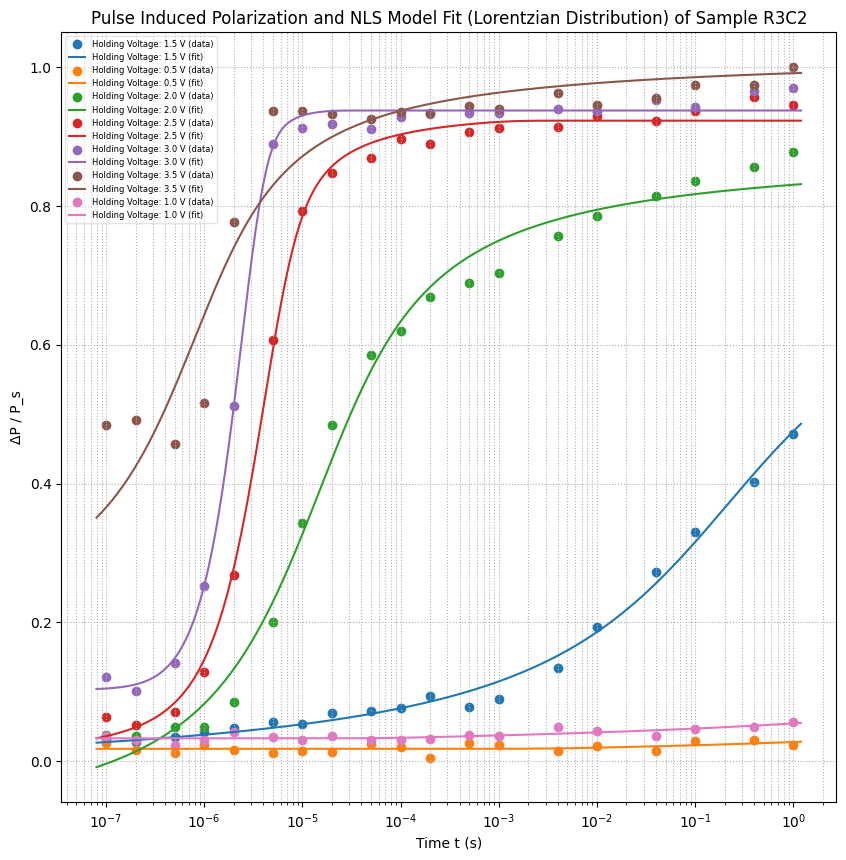

In [12]:
plt.figure(figsize=(10, 10))
spontaneous_polarization = 0.4043897154781218
# 通过3.5V dataset 的maximum polarization 来计算self-polarization
current_data = NLS_Model_Fit.plot_and_fit_data()
for hold_volt in current_data.plot_data:
    if hold_volt != 4:
        # 转换为numpy数组
        current_data.plot_data[hold_volt] = np.array(current_data.plot_data[hold_volt])
        # 按x值（第一列）排序
        sorted_indices = np.argsort(current_data.plot_data[hold_volt][:, 0])
        sorted_data = current_data.plot_data[hold_volt][sorted_indices]
        temp_fit = NLS_Model_Fit.nls_model_fit(sorted_data[:,0], delta_p = sorted_data[:,1], p_s = spontaneous_polarization, bounds = True)
        temp_fit.fit_nls_lorentz(plot = False)
        # raw data point plot
        plt.scatter(sorted_data[:,0], sorted_data[:,1]/spontaneous_polarization, 
            label=f'Holding Voltage: {hold_volt} V (data)',
            marker='o',
            linestyle='-')
        plt.xscale('log')
        # fitted curve plot
        t_dense = np.logspace(np.log10(np.min(sorted_data[:,0])*0.8), np.log10(np.max(sorted_data[:,0])*1.2), 400)
        y_dense = NLS_Model_Fit.nls_model_fit._nls_model(t_dense, temp_fit.t1, temp_fit.w, A=temp_fit.A, B=temp_fit.B)
        plt.semilogx(t_dense, y_dense, '-', label=f'Holding Voltage: {hold_volt} V (fit)')
    
plt.rcParams['legend.fontsize'] = 6
plt.rcParams['legend.framealpha'] = 0.5
plt.rcParams['legend.loc'] = 'best'
plt.xlabel("Time t (s)")
plt.ylabel("ΔP / P_s")
plt.title("Pulse Induced Polarization and NLS Model Fit (Lorentzian Distribution) of Sample R3C2")
plt.grid(True, which='both', ls=':')
plt.legend()
plt.show()
